In [ ]:

#Aim: Write a program to implement a simple form of a recurrent neural network like LSTM for sentiment
#      analysis on datasets like UMICH SI650 for similar


Epoch 1/10
156/156 [==============================] - 134s 615ms/step - loss: 0.6837 - accuracy: 0.5689 - val_loss: 0.6887 - val_accuracy: 0.5523
Epoch 2/10
156/156 [==============================] - 92s 584ms/step - loss: 0.6841 - accuracy: 0.5689 - val_loss: 0.6878 - val_accuracy: 0.5523
Epoch 3/10
156/156 [==============================] - 105s 674ms/step - loss: 0.6840 - accuracy: 0.5689 - val_loss: 0.6877 - val_accuracy: 0.5523
Epoch 4/10
156/156 [==============================] - 86s 549ms/step - loss: 0.6836 - accuracy: 0.5691 - val_loss: 0.6948 - val_accuracy: 0.5523
Epoch 5/10
156/156 [==============================] - 83s 534ms/step - loss: 0.6846 - accuracy: 0.5693 - val_loss: 0.6877 - val_accuracy: 0.5523
Epoch 6/10
156/156 [==============================] - 79s 508ms/step - loss: 0.6836 - accuracy: 0.5693 - val_loss: 0.6877 - val_accuracy: 0.5523
Epoch 7/10
156/156 [==============================] - 78s 499ms/step - loss: 0.6838 - accuracy: 0.5693 - val_loss: 0.6880 - val_

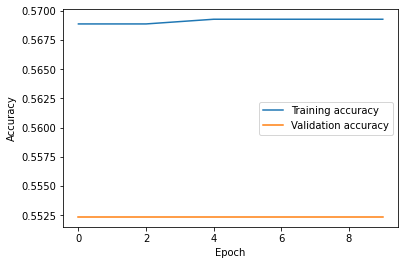

Text: this quiz sucks and harry potter sucks ok bye <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
Actual label: 0
Predicted label: 1


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Load data
data = pd.read_csv("training.txt", delimiter="\t", names=["label", "text"])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["text"],data["label"],test_size=0.2, random_state=42)

# Tokenize words
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert words to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have same length
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length,padding="post",truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length,padding="post",truncating="post")

# Build LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32,input_length=max_length),
    tf.keras.layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

# Train model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32,validation_split=0.1)

# Evaluate model on test data
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Plot training and validation accuracy over time
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test_pad)

# Print input, output, and prediction for random example
index = np.random.randint(0, len(X_test_pad))
text = tokenizer.sequences_to_texts([X_test_pad[index]])[0]
label = y_test.values[index]
prediction = predictions[index][0]
print("Text:", text)
print("Actual label:", label)
print("Predicted label:", round(prediction))